# Text EDA

## Imports

In [1]:
import pickle
import seaborn
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

from helper import *



## Load Data

In [2]:
!ls ../data/

axioms_e_hl4.pkl  axioms_iprover_hl4.pkl  axioms_vampire_jjt.pkl
axioms_e_jjt.pkl  axioms_iprover_jjt.pkl


In [3]:
#data_path = '../data/axioms_iprover_hl4.pkl'
#data_path = '../data/axioms_e_hl4.pkl'

#data_path = '../data/axioms_vampire_jjt.pkl'
data_path = '../data/axioms_e_jjt.pkl'




#data_path = '../data/axioms_iprover_jjt.pkl'
#data_path = "../axioms_e_hl4.pkl"

#data_path = "/home/eholden/PycharmProjects/image_caption/descriptions.txt"


In [4]:

if ".pkl" in data_path:

    with open(data_path, 'rb') as f:
        data = pickle.load(f)
else:
    with open(data_path, 'rb') as f:
        desc = f.readlines()

    data = {}
    for i in range(len(desc)):
        # Convert to string and remove trailign newline
        desc[i] = desc[i].decode("utf-8")[:-1]
        k, *v = desc[i].split()
        data[k] = v

In [5]:
data

{'?C=N;O=D': [],
 '?C=M;O=A': [],
 '?C=S;O=A': [],
 '?C=D;O=A': [],
 '/CASC/28/WWWFiles/Results/JJT/': [],
 'JJT00001': [' ![X16, X17, X11]:((pp(aa_a_bool(aa_set7955793875814394028a_bool(comple2590936771704418607a_bool,aa_set1875453209621931573a_bool(aa_fun807332449041869010a_bool(image_b_fun_a_bool,cOMBB_5316197514048866793bool_b(cOMBC_a_set_a_bool(member_a),X16)),X17)),X11))<=>pp(aa_set_a_bool(aa_a_fun_set_a_bool(member_a,X11),aa_set_set_a_set_a(comple2307003609928055243_set_a,aa_set_b_set_set_a(aa_fun5687960783738382594_set_a(image_b_set_a,X16),X17)))))), '],
 'JJT00003': [],
 'JJT00004': [' ![X2:fun_b_set_a]:(aa_fun_b_set_a_set_a(aa_set1209572290525475058_set_a(bind_b_a,bot_bot_set_b),X2)=bot_bot_set_a), ',
  ' ![X71:set_b, X2:fun_b_set_a]:(aa_fun_b_set_a_set_a(aa_set1209572290525475058_set_a(bind_b_a,X71),X2)=aa_set_set_a_set_a(comple2307003609928055243_set_a,aa_set_b_set_set_a(aa_fun5687960783738382594_set_a(image_b_set_a,X2),X71))), ',
  ' ![X74:b]:(aa_b_set_b(set_single_b,X74)=

## Axiom Stats

Number of proofs:  10005
Number of proofs with axioms  6697

Total number of axioms:  26855
Number of unique axioms:  20655

Examples of extracted axioms
 ![X16, X17, X11]:((pp(aa_a_bool(aa_set7955793875814394028a_bool(comple2590936771704418607a_bool,aa_set1875453209621931573a_bool(aa_fun807332449041869010a_bool(image_b_fun_a_bool,cOMBB_5316197514048866793bool_b(cOMBC_a_set_a_bool(member_a),X16)),X17)),X11))<=>pp(aa_set_a_bool(aa_a_fun_set_a_bool(member_a,X11),aa_set_set_a_set_a(comple2307003609928055243_set_a,aa_set_b_set_set_a(aa_fun5687960783738382594_set_a(image_b_set_a,X16),X17)))))), 
 ![X2:fun_b_set_a]:(aa_fun_b_set_a_set_a(aa_set1209572290525475058_set_a(bind_b_a,bot_bot_set_b),X2)=bot_bot_set_a), 
 ![X71:set_b, X2:fun_b_set_a]:(aa_fun_b_set_a_set_a(aa_set1209572290525475058_set_a(bind_b_a,X71),X2)=aa_set_set_a_set_a(comple2307003609928055243_set_a,aa_set_b_set_set_a(aa_fun5687960783738382594_set_a(image_b_set_a,X2),X71))), 
 ![X74:b]:(aa_b_set_b(set_single_b,X74)=aa_set_b_set_

<AxesSubplot:ylabel='Count'>

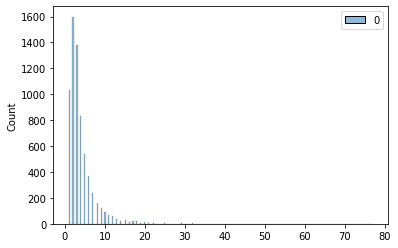

In [6]:
print("Number of proofs: ", len(data))

for key in list(data.keys()):
    if len(data[key]) < 1:
        del data[key]
print("Number of proofs with axioms ", len(data))
print()

all_axioms = []
for k, axiom_list in data.items():
    for ax in axiom_list:
        all_axioms.append(ax)

print("Total number of axioms: ", len(all_axioms))
print("Number of unique axioms: ", len(set(all_axioms)))
print()
print("Examples of extracted axioms")
for ax in all_axioms[0:5]:
    print(ax)
print()

# General stats
axiom_count = {prob: len(axiom_list) for prob, axiom_list in data.items()}
print("Max number of axioms: ", max(v for v in axiom_count.values()))
print("Min number of axioms: ", min(v for v in axiom_count.values()))
print("Avg number of axioms: {0:.2f}".format(sum(v for v in axiom_count.values()) / len(data)))

print()
print("Number of problems with zero axioms: ", sum(1 for v in axiom_count.values() if v == 0))

# Plot the distribution of axioms
seaborn.histplot(axiom_count.values())

# Top 15 axioms

In [7]:
all_text = []
for sentence in data.values():
    all_text += sentence

for ax, occ in Counter(all_text).most_common(15):
    print(occ, ax)
    print()
del all_text

159  pp(fTrue), 

148  ~(pp(fFalse)), 

122  xcpa=none_addr, 

73  xsa=loca, 

61  ![X15, X2]:((pp(aa_nat_bool(aa_nat_fun_nat_bool(ord_less_nat,X15),X2))<=>(pp(aa_nat_bool(aa_nat_fun_nat_bool(ord_less_eq_nat,X15),X2))&X15!=X2))), 

41  pp(aa_set_a_bool(aa_a_fun_set_a_bool(member_a,x),a2)), 

34  one_one_nat=aa_nat_nat(suc,zero_zero_nat), 

33  pp(aa_set_a_bool(aa_a_fun_set_a_bool(member_a,y),a2)), 

31  wf_jvm_prog_phi_addr(phi,p), 

31  ![X12, X13, X14, X2, X3, X4, X5, X6, X7, X8, X9, X10]:((gg_option_addr(X10)=>(pp(aa_Pro129517664726811720r_bool(aa_Pro5140844021850094620r_bool(aa_exp2553715579446604183r_bool(aa_hea3041824934989572089r_bool(aa_pro7942258814560404286r_bool(j1_JVM6469876078657283980t_addr(X12,X13,X14),X2),X3),X4),produc3757444143288171145l_addr(aa_val6233561088156587618t_addr(val_addr_nat_nat,X5),X6)),produc350127374499714307n_addr(X7,produc602756267255014964n_addr(X8,produc5861770029389436205n_addr(X9,X10)))))=>(X6=X8&X10=none_addr)))), 

30  pp(aa_heap_bool(aa_hea2989

## Compute dictionary and tokenize the axioms

In [8]:
ax_to_id = {}
id_to_ax = {}
count = 0
for ax in sorted(set(all_axioms)):
    if ax not in ax_to_id:
        ax_to_id[ax] = count
        id_to_ax[count] = ax
        count +=1

assert len(ax_to_id) == len(id_to_ax)
print("Dict size: ", len(ax_to_id))

print("Remove proofs with no axioms and tokenize")
text = []
for problem, proof in data.items():
    if len(proof) == 0:
        continue

    # Tokenize
    axiom_sentence = ' '.join([str(ax_to_id[p]) for p in proof])
    text.append(axiom_sentence)

Dict size:  20655
Remove proofs with no axioms and tokenize


# Investigate the frequency of the axioms in the proofs

In [9]:
document_frequency = [1, 2, 4, 8, 10,  int(len(text) * 0.01), int(len(text) * 0.05), int(len(text) * 0.1)]
for df in document_frequency:
    tfidf = TfidfVectorizer(min_df=df)
    tfidf.fit_transform(text)
    print("Number of axioms occuring in at least {1} proof(s): {0}".format(len(tfidf.vocabulary_), df))

Number of axioms occuring in at least 1 proof(s): 20645
Number of axioms occuring in at least 2 proof(s): 2631
Number of axioms occuring in at least 4 proof(s): 535
Number of axioms occuring in at least 8 proof(s): 128
Number of axioms occuring in at least 10 proof(s): 86
Number of axioms occuring in at least 66 proof(s): 4


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

# Include axioms that are used in at least two proofs

In [ ]:
print("Computing Tf-IDF features with axioms occuring in at least 2 proofs")
tfidf = TfidfVectorizer(min_df=2)
feat = tfidf.fit_transform(text)

# Compute number of problems with no features
oov_count = 0
for f in feat.toarray():
    #print(f)
    if sum(f) == 0:
        oov_count += 1
print("Number of problems with all out of dict features: ", oov_count)

# Plot the vectors to see their sparsity

In [ ]:
sns.heatmap(feat.toarray(), cmap="coolwarm")

# Cluster the proofs based on their axiom data

In [ ]:
find_optimal_clusters(feat, 30)
no_clusters = 26
print("Set optimal number of clusters as: ", no_clusters)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=no_clusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(feat)
print("Number of problems per cluster: ", Counter(clusters))

# Plot the PC/T-SNE representation of the lcusters with the KMeans labels

In [ ]:
plot_tsne_pca(feat, clusters)

# Show the most common axioms in each cluster

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\n## Cluster {}'.format(i))
        print('\n'.join(sorted([id_to_ax[t] for t in np.argsort(r)[-n_terms:]])))

get_top_keywords(feat, clusters, tfidf.get_feature_names(), 5)
